# Machine Learning met Python

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

sns.set_style('white')
sns.set_context('poster')

## Logistic regression example

X ~ n_samples x n_features: (100, 2)
y ~ n_samples: (100,)

First 5 samples:
 [[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]

First 5 labels: [1 1 0 0 1]
This is what they look like, colored by the label:


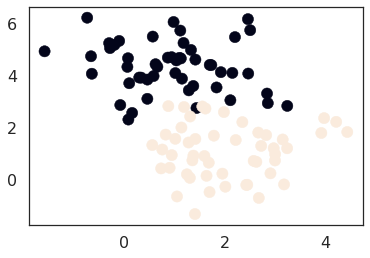

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=0)

print('X ~ n_samples x n_features:', X.shape)
print('y ~ n_samples:', y.shape)

print('\nFirst 5 samples:\n', X[:5, :])
print('\nFirst 5 labels:', y[:5])

plt.scatter(X[:,0], X[:,1], c=y);
print("This is what they look like, colored by the label:")

In [3]:
x  =  np.reshape(X[:,1], (-1, 1))          # That reshape trick is to get the right shape for the classifier# That r 
print(np.shape(x))
print(np.shape(y))

(100, 1)
(100,)


In [4]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [5]:
classifier.fit(x, y)
classifier.score(x,y)

0.94

(100, 2)


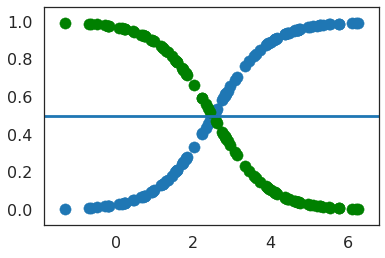

In [6]:
print(np.shape(classifier.predict_proba(x)))
plt.scatter(x, classifier.predict_proba(x)[:,0])
plt.scatter(x, classifier.predict_proba(x)[:,1], c='green')
plt.axhline(y=0.5);

(100, 2)


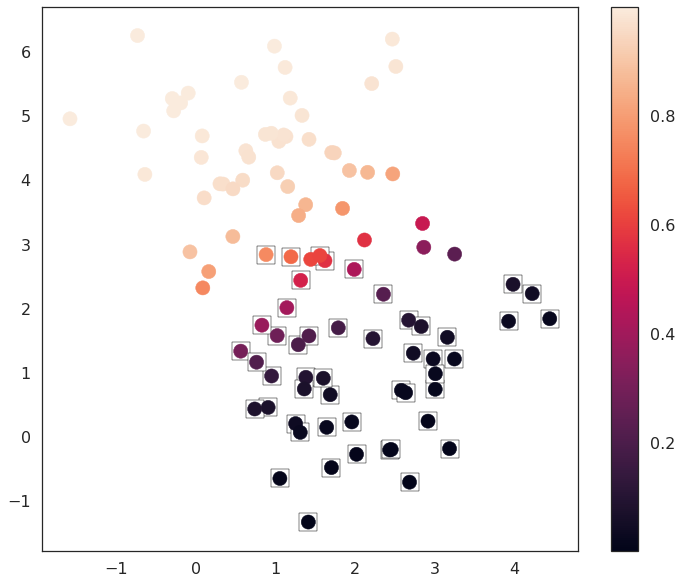

In [7]:
classifier.fit(X, y)
classifier.score(X,y)

print(np.shape(classifier.predict_proba(X)))
plt.figure(figsize=(12, 10))
plt.scatter(X[y==1,0], X[y==1,1], s=300, marker='s', c='white', edgecolors='black')
plt.scatter(X[:,0], X[:,1], c=classifier.predict_proba(X)[:,0], s=200)
plt.colorbar();

## k-means clustering example

(100, 2)


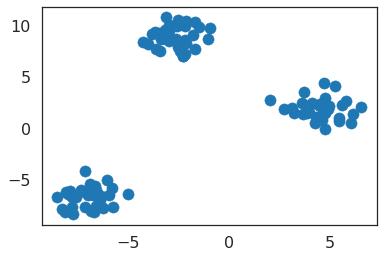

In [8]:
X, y = make_blobs(random_state=42)
print(X.shape)

plt.scatter(X[:, 0], X[:, 1]);

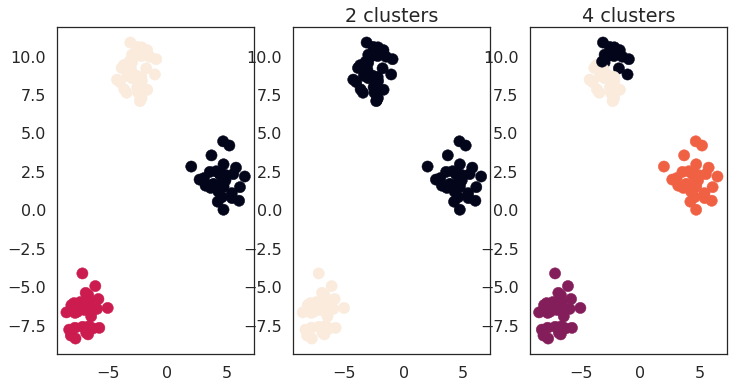

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=labels);

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=labels);
plt.title("2 clusters");

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("4 clusters");

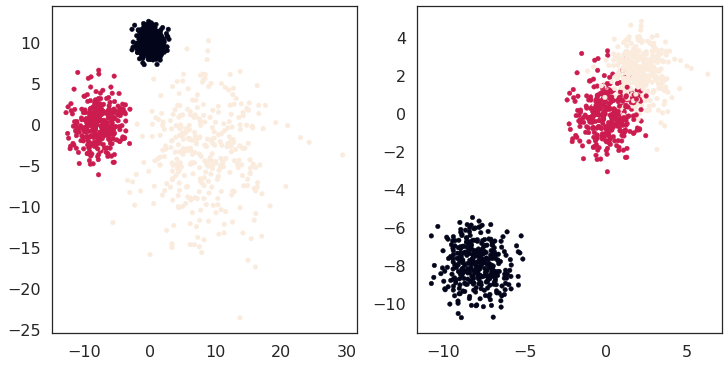

In [10]:
X1, y1 = make_blobs(random_state=101, cluster_std=[1, 2, 5], centers=[[0, 10],[-8, 0], [8,-4]], n_samples=1000, )
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=20)
X2, y2 = make_blobs(random_state=101, centers=[[-8, -8],[0, 0], [2,2]], n_samples=1000, )
plt.subplot(122)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=20);

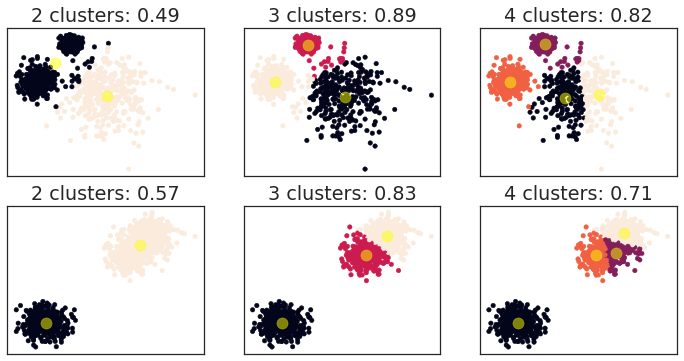

In [11]:

from sklearn.metrics import adjusted_rand_score

plt.figure(figsize=(12,6))
for i in range(6):
    if i<3: 
        X = X1
        y = y1
    else: 
        X = X2
        y = y2
    ncl = (i%3)+2
    kmeans = KMeans(n_clusters=ncl, random_state=42)
    labels = kmeans.fit_predict(X)
    plt.subplot(2,3,i+1)
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=20)
    plt.xticks([])
    plt.yticks([])
    plt.title(str(ncl)+" clusters: %.2f" % adjusted_rand_score(labels, y));
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='yellow', alpha=0.5);

## Neural networks example

Zolang we scikit-learn's Multi-layer Perceptron gebruiken kunnen we het hele netwerk in 1 keer definieren.


In [12]:
digitfile  = 'data/digits_train_sample.csv'

digits = pd.read_csv(digitfile, sep=',')
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


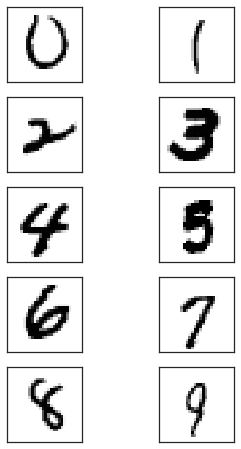

In [13]:
# You might notice that there are 784 pixels, which happens to be 28**2, which is the shape of the images# You m 
imsize = 28

# Let's plot a random example of each one - Running this a few times will give you different images each time! 
plt.figure(figsize=[5, 8])
for target in range(10):
    deze = np.random.choice(digits[digits.label == target].index)
    number = np.reshape(np.array(digits[digits.index == deze])[0][1:], [imsize, imsize])
    pp = plt.subplot(5, 2, target+1)
    pp.imshow(number, cmap='Greys')
    pp.set_xticklabels([])
    pp.set_yticklabels([])

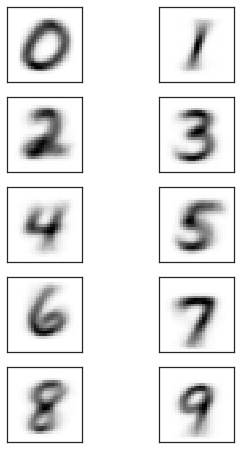

In [14]:
pertarget = digits.groupby('label')
avpixels = pertarget.mean()

plt.figure(figsize=[5, 8])
for target in range(10):
    number = np.reshape(np.array(avpixels[avpixels.index == target])[0], [imsize, imsize])
    pp = plt.subplot(5, 2, target+1)
    pp.imshow(number, interpolation='nearest', cmap='Greys')
    pp.set_xticklabels([])
    pp.set_yticklabels([])

In [15]:
labels = digits.label
features = digits.iloc[:,1:]

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

xtr, x, ytr, y = train_test_split(features, labels, test_size=0.3)
clf = LogisticRegression()

In [17]:
clf.fit(xtr, ytr)
print(clf.score(xtr, ytr))
print(clf.score(x, y))

1.0
0.8183333333333334


/home/D1/mhaas/.conda/envs/saspy/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


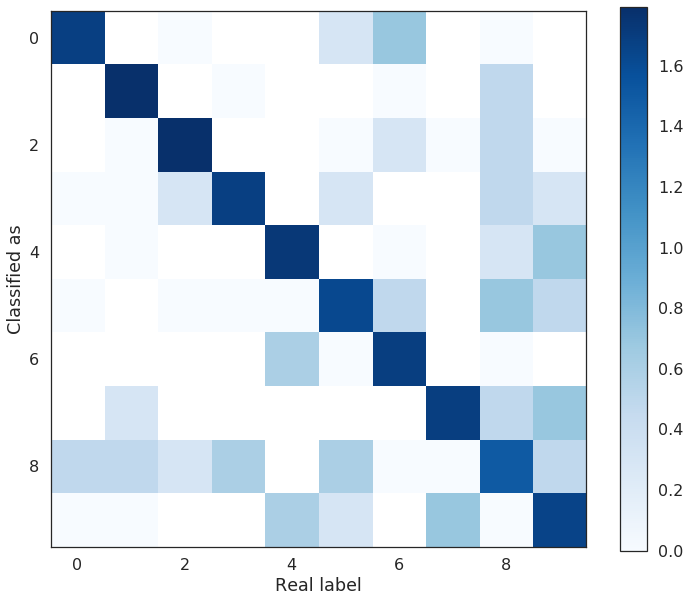

In [18]:
plt.figure(figsize=(12, 10))
plt.imshow(np.log10(confusion_matrix(y, clf.predict(x))), interpolation='nearest', cmap='Blues')
plt.xlabel("Real label")
plt.ylabel("Classified as")
plt.colorbar()

In [19]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original", data_home='./data/')  # Data stored in subdirectory data

X, y = mnist.data / 255., mnist.target

In [20]:
xtr, x, ytr, y = train_test_split(X, y, test_size=0.3)
clf = LogisticRegression()
clf.fit(xtr, ytr)
print(clf.score(xtr, ytr))
print(clf.score(x, y))


0.9289387755102041
0.9176190476190477


In [21]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

In [22]:
mlp.fit(xtr, ytr)
mlp.score(x, y)

0.9756190476190476

In [23]:
mlp = MLPClassifier(hidden_layer_sizes=(200, 50, 50), max_iter=100, alpha=1e-4,
                    solver='sgd', verbose=50, tol=1e-4, random_state=1,
                    learning_rate_init=.1 )

mlp.fit(xtr, ytr)
mlp.score(x, y)

Iteration 1, loss = 0.32608834
Iteration 2, loss = 0.11406529
Iteration 3, loss = 0.08043112
Iteration 4, loss = 0.06145172
Iteration 5, loss = 0.04542927
Iteration 6, loss = 0.04153632
Iteration 7, loss = 0.03071907
Iteration 8, loss = 0.03097098
Iteration 9, loss = 0.02119017
Iteration 10, loss = 0.01621637
Iteration 11, loss = 0.02011740
Iteration 12, loss = 0.02654678
Iteration 13, loss = 0.01490106
Iteration 14, loss = 0.01268162
Iteration 15, loss = 0.01361628
Iteration 16, loss = 0.01479737
Iteration 17, loss = 0.00910717
Iteration 18, loss = 0.00657629
Iteration 19, loss = 0.00873018
Iteration 20, loss = 0.01422638
Iteration 21, loss = 0.01068855
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


0.9794761904761905

## Tensorflow via Keras

Definitie per laag in het netwerk. Meer vrijheid, dus meer werk.

In [24]:
import tensorflow as tf

/home/D1/mhaas/.conda/envs/saspy/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [25]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(200, activation=tf.nn.relu),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(xtr, ytr, epochs=10)
print(model.evaluate(xtr, ytr))
model.evaluate(x, y)

Epoch 1/10
49000/49000 [==============================] - 10s 200us/step - loss: 0.2534 - acc: 0.9271
Epoch 2/10
49000/49000 [==============================] - 11s 231us/step - loss: 0.1030 - acc: 0.9677
Epoch 3/10
49000/49000 [==============================] - 9s 174us/step - loss: 0.0706 - acc: 0.9778
Epoch 4/10
49000/49000 [==============================] - 9s 193us/step - loss: 0.0551 - acc: 0.9821
Epoch 5/10
49000/49000 [==============================] - 10s 194us/step - loss: 0.0421 - acc: 0.9864
Epoch 6/10
49000/49000 [==============================] - 11s 215us/step - loss: 0.0345 - acc: 0.9885
Epoch 7/10
49000/49000 [==============================] - 11s 224us/step - loss: 0.0311 - acc: 0.9894
Epoch 8/10
49000/49000 [==============================] - 11s 223us/step - loss: 0.0278 - acc: 0.9909
Epoch 9/10
49000/49000 [==============================] - 11s 232us/step - loss: 0.0227 - acc: 0.9927
Epoch 10/10
49000/49000 [==============================] - 3s 57us/step
[0.032157831

[0.1341309543965451, 0.9713333333333334]

In [26]:
auto_encoder = tf.keras.models.Sequential([
  tf.keras.layers.Dense(200, activation=tf.nn.relu),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(2, activation=tf.nn.relu),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(200, activation=tf.nn.softmax)
])
auto_encoder.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

auto_encoder.fit(xtr, ytr, epochs=10)
print("Training performance:", auto_encoder.evaluate(xtr, ytr))
print("Test performance:", auto_encoder.evaluate(x, y))

Epoch 1/10
49000/49000 [==============================] - 12s 245us/step - loss: 1.8855 - acc: 0.2889
Epoch 2/10
49000/49000 [==============================] - 11s 233us/step - loss: 0.4593 - acc: 0.8703
Epoch 3/10
49000/49000 [==============================] - 12s 250us/step - loss: 0.2574 - acc: 0.9357
Epoch 4/10
49000/49000 [==============================] - 11s 229us/step - loss: 0.2008 - acc: 0.9505
Epoch 5/10
49000/49000 [==============================] - 11s 223us/step - loss: 0.1606 - acc: 0.9607
Epoch 6/10
49000/49000 [==============================] - 12s 236us/step - loss: 0.1361 - acc: 0.9668
Epoch 7/10
49000/49000 [==============================] - 13s 260us/step - loss: 0.1203 - acc: 0.9702
Epoch 8/10
49000/49000 [==============================] - 12s 237us/step - loss: 0.1056 - acc: 0.9739
Epoch 9/10
49000/49000 [==============================] - 14s 282us/step - loss: 0.0928 - acc: 0.9764
Epoch 10/10
49000/49000 [==============================] - 4s 73us/step
Training p

In [27]:
auto_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_5 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 102       
_________________________________________________________________
dense_7 (Dense)              (None, 50)                150       
_________________________________________________________________
dense_8 (Dense)              (None, 200)               10200     
Total params: 177,502
Trainable params: 177,502
Non-trainable params: 0
_________________________________________________________________


In [28]:
middelste = auto_encoder.layers[2]
print(type(middelste.output))
print(middelste.output_shape)

<class 'tensorflow.python.framework.ops.Tensor'>
(None, 2)


In [29]:
from tensorflow.keras import backend as K

get_middle_layer_output = K.function([auto_encoder.layers[0].input],
                                  [auto_encoder.layers[2].output])
layer_output = get_middle_layer_output([xtr])[0]

In [30]:
layer_output.shape

(49000, 2)

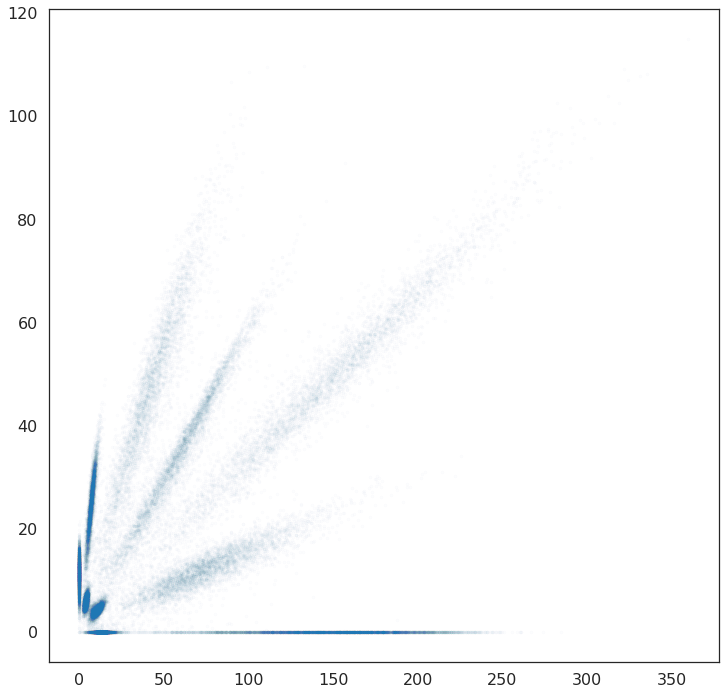

In [31]:
plt.figure(figsize=[12, 12])
plt.scatter(layer_output[:,0], layer_output[:,1], s=10, alpha=0.01)
# plt.semilogx()
# plt.semilogy()
# plt.xlim(-1,1)
# plt.ylim(1,2e2)

In [40]:
real_encoder = tf.keras.models.Sequential([
  tf.keras.layers.Dense(784, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(2, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(784, activation=tf.nn.relu)
])
real_encoder.compile(loss=tf.keras.losses.mean_squared_error,
             optimizer=tf.keras.optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0),
             metrics = ['accuracy'])

real_encoder.fit(xtr, xtr, epochs=10, batch_size=256)
print("Training performance:", real_encoder.evaluate(xtr, xtr))
# print("Test performance:", real_encoder.evaluate(x, y))

Epoch 1/10
49000/49000 [==============================] - 9s 184us/step - loss: 0.0840 - acc: 0.0031
Epoch 2/10
49000/49000 [==============================] - 9s 175us/step - loss: 0.0751 - acc: 0.0074
Epoch 3/10
49000/49000 [==============================] - 9s 177us/step - loss: 0.0735 - acc: 0.0130
Epoch 4/10
49000/49000 [==============================] - 8s 160us/step - loss: 0.0729 - acc: 0.0164
Epoch 5/10
49000/49000 [==============================] - 8s 171us/step - loss: 0.0721 - acc: 0.0192
Epoch 6/10
49000/49000 [==============================] - 7s 141us/step - loss: 0.0708 - acc: 0.0185
Epoch 7/10
49000/49000 [==============================] - 8s 169us/step - loss: 0.0703 - acc: 0.0183
Epoch 8/10
49000/49000 [==============================] - 7s 145us/step - loss: 0.0700 - acc: 0.0198
Epoch 9/10
49000/49000 [==============================] - 8s 160us/step - loss: 0.0698 - acc: 0.0196
Epoch 10/10
49000/49000 [==============================] - 6s 130us/step
Training performan

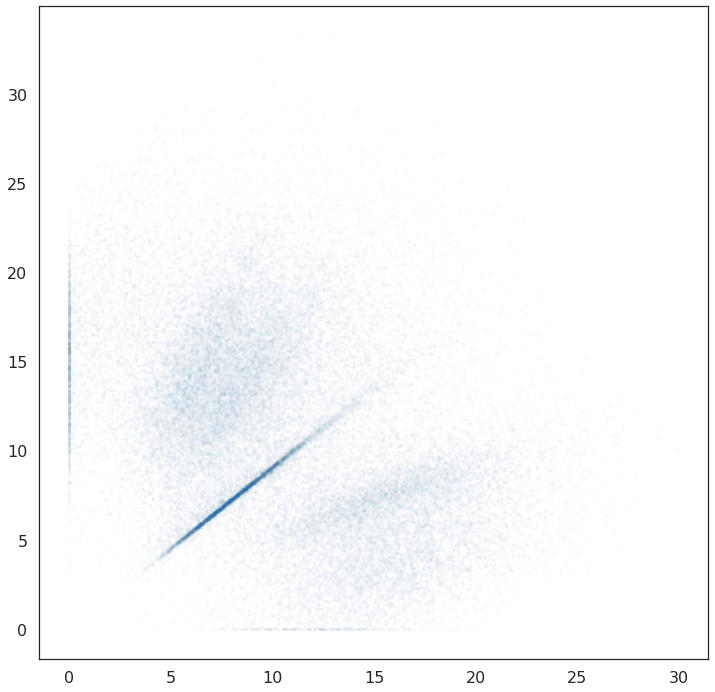

In [41]:
get_middle_layer_output = K.function([real_encoder.layers[0].input],
                                  [real_encoder.layers[2].output])
layer_output = get_middle_layer_output([xtr])[0]
plt.figure(figsize=[12, 12])
plt.scatter(layer_output[:,0], layer_output[:,1], s=10, alpha=0.01)
# plt.ylim([-0.0001, 0.0001])

In [34]:
big_encoder = tf.keras.models.Sequential([
  tf.keras.layers.Dense(784, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(784, activation=tf.nn.relu)
])
big_encoder.compile(loss=tf.keras.losses.mean_squared_error,
             optimizer=tf.keras.optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0),
             metrics = ['accuracy'])

big_encoder.fit(xtr, xtr, epochs=10, batch_size=256)
print("Training performance:", big_encoder.evaluate(xtr, xtr))
# print("Test performance:", real_encoder.evaluate(x, y))

Epoch 1/10
49000/49000 [==============================] - 12s 240us/step - loss: 0.0827 - acc: 0.0076
Epoch 2/10
49000/49000 [==============================] - 11s 222us/step - loss: 0.0733 - acc: 0.0134
Epoch 3/10
49000/49000 [==============================] - 9s 178us/step - loss: 0.0711 - acc: 0.0187
Epoch 4/10
49000/49000 [==============================] - 10s 206us/step - loss: 0.0701 - acc: 0.0178
Epoch 5/10
49000/49000 [==============================] - 12s 239us/step - loss: 0.0692 - acc: 0.0185
Epoch 6/10
49000/49000 [==============================] - 9s 190us/step - loss: 0.0681 - acc: 0.0186
Epoch 7/10
49000/49000 [==============================] - 11s 222us/step - loss: 0.0674 - acc: 0.0168
Epoch 8/10
49000/49000 [==============================] - 11s 225us/step - loss: 0.0666 - acc: 0.0170
Epoch 9/10
49000/49000 [==============================] - 10s 195us/step - loss: 0.0661 - acc: 0.0173
Epoch 10/10
49000/49000 [==============================] - 6s 132us/step
Training pe

In [35]:
reconstructed = big_encoder.predict(xtr)

[]

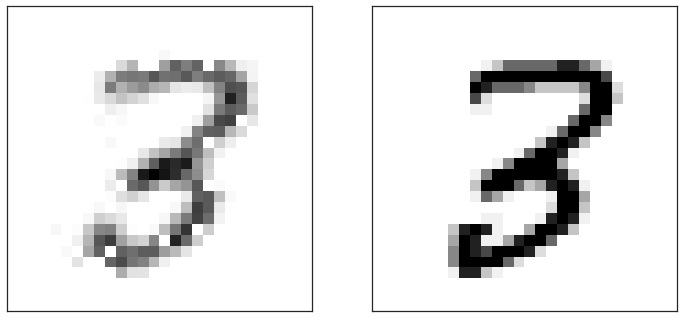

In [43]:
imsize = 28
aantal_im = len(xtr)
deze = np.random.randint(0, aantal_im)

plt.figure(figsize=(12, 24))
pp = plt.subplot(121)
number = np.reshape(reconstructed[deze], [imsize, imsize])
pp.imshow(number, cmap='Greys')
pp.set_xticklabels([])
pp.set_yticklabels([])

pp = plt.subplot(122)
number = np.reshape(xtr[deze], [imsize, imsize])
pp.imshow(number, cmap='Greys')
pp.set_xticklabels([])
pp.set_yticklabels([])


In [44]:
real_constructed = real_encoder.predict(xtr)

[]

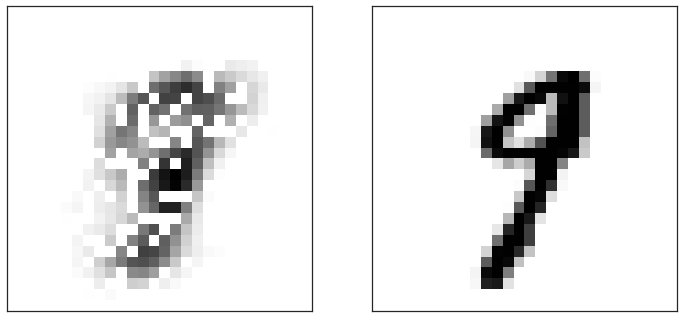

In [52]:
imsize = 28
aantal_im = len(xtr)
deze = np.random.randint(0, aantal_im)

plt.figure(figsize=(12, 24))
pp = plt.subplot(121)
number = np.reshape(real_constructed[deze], [imsize, imsize])
pp.imshow(number, cmap='Greys')
pp.set_xticklabels([])
pp.set_yticklabels([])

pp = plt.subplot(122)
number = np.reshape(xtr[deze], [imsize, imsize])
pp.imshow(number, cmap='Greys')
pp.set_xticklabels([])
pp.set_yticklabels([])


## Referenties

Python Data Science Handbook (en al het andere youtube- en blogmateriaal van auteur Jake VanderPlas, zie http://jakevdp.github.io/), geheel in notebooks op github: https://jakevdp.github.io/PythonDataScienceHandbook/

Antwoorden op al je vragen (of ze staan er al, of je hebt ze snel) op StackOverflow: https://stackoverflow.com/

Documentatie van de voor data science belangrijke paketten: https://docs.scipy.org/doc/, http://pandas.pydata.org/pandas-docs/stable/

Voor visualisatie gebruiken we matplotlib (https://matplotlib.org/ en de gallery op https://matplotlib.org/gallery/index.html), seaborn (https://seaborn.pydata.org/) en bokeh (https://bokeh.pydata.org/en/latest/).

Verder vind je op YouTube veel praatjes en workshops (vaak met materiaal op github). Let er wel op dat je redelijk recent materiaal bekijkt, sommige van deze paketten zijn nog stevig in ontwikkeling. Op YouTube kun je zoeken naar PyData, (Euro)SciPy, Pycon, Enthought en Numfocus. Dat geeft je een hele hoop materiaal.